In [57]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

from activation.elementwise import Identity, ReLU, Sigmoid
from activation.blockwise import Softmax
from loss.classification import NLLL, BCE
import model.sequential as sq

In [72]:
def create_training_sets(n_samples=[100, 100, 1000], shuffle=True, noise=None, random_state=None):
    sets = []
    for n in n_samples:
        # Create moon dataset
        set_x, set_y = make_moons(n_samples=n, shuffle=shuffle, noise=noise, random_state=random_state)
        set_x = set_x.reshape(-1, 2, 1)
        set_y = set_y.reshape(-1, 1)
        sets.append([set_x, set_y])
    return sets

sets = create_training_sets(noise = 0.1)
train_x, train_y = sets[0]
valid_x, valid_y = sets[1]
test_x, test_y = sets[2]

In [73]:
def train_loop(model, train_x, train_y, valid_x, valid_y, n_iters, lr, print_every = 100):
    train_l, valid_l = [], []
    
    # Performing updates to model
    for i in range(n_iters):
        pred_y = model(train_x)

        # Evaluate loss
        train_l.append(model.eval_loss(pred_y, train_y).mean())

        # Perform backpropagation
        model.backward()

        # Perform update
        model.update(lr)
        
        # Evaluate validation loss
        model.eval()
        vpred_y = model(valid_x)
        valid_l.append(model.eval_loss(vpred_y, valid_y).mean())
        model.train()
        
        if (i+1) % print_every == 0:
            averaged_train_l = np.mean(train_l[-print_every:])
            averaged_valid_l = np.mean(valid_l[-print_every:])
            
            print("{:.2f}: Training loss = {:.2f}, Validation loss = {:.2f}".format((i+1)/n_iters,
                                                                                    averaged_train_l, 
                                                                                    averaged_valid_l), end = "\r")
    return model, train_l, valid_l

In [85]:
# Create sequential model with the following layer sizes
sizes = np.array([2, 10, 10, 10, 10, 1])

# After each layer apply
activ = [ReLU, ReLU, ReLU, ReLU, Sigmoid]

# Use negativve log-likelihood to train
loss = BCE

In [86]:
# Model definition, use backpropagation
model = sq.Sequential(sizes, activ, loss, backprop = True)
model.train()

In [87]:
model, train_l, valid_l = train_loop(
    model, 
    train_x, train_y, 
    valid_x, valid_y, 
    n_iters = 2000, 
    lr = 1e-6, 
    print_every = 100
)

/Users/yassirfathullah/Documents/tiny-missing-grad/loss/classification.py:56: RuntimeWarning: divide by zero encountered in log
  l = - (y * np.log(x) + (1 - y) * np.log(1 - x))
/Users/yassirfathullah/Documents/tiny-missing-grad/loss/classification.py:56: RuntimeWarning: invalid value encountered in multiply
  l = - (y * np.log(x) + (1 - y) * np.log(1 - x))


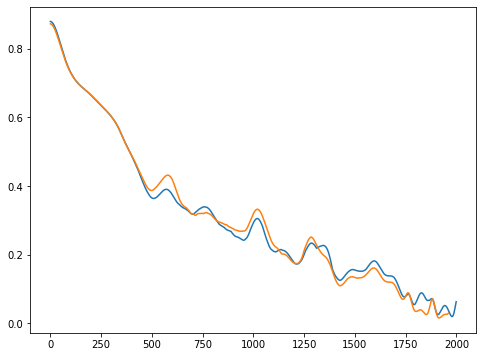

In [88]:
plt.figure(figsize = (8, 6))
plt.plot(train_l)
plt.plot(valid_l)

In [89]:
# Model definition, don't use backpropagation
model_free = sq.Sequential(sizes, activ, loss, backprop = False)
model_free.train()

In [90]:
model_free, train_l, valid_l = train_loop(
    model_free, 
    train_x, train_y, 
    valid_x, valid_y, 
    n_iters = 2000, 
    lr = 1e-6, 
    print_every = 100
)

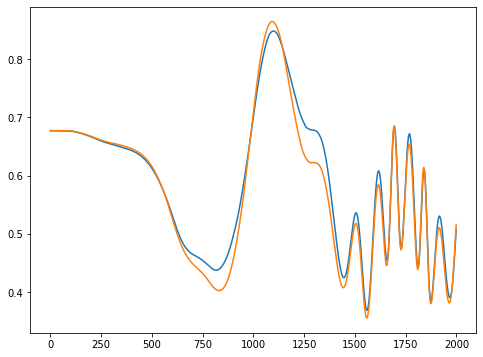

In [91]:
plt.figure(figsize = (8, 6))
plt.plot(train_l)
plt.plot(valid_l)